In [73]:
import pandas as pd
#tablas a importar
tablas = ['winequality-red.csv',
          'winequality-white.csv']

archivos = []

ruta_data = 'data'  # Ruta relativa a la carpeta "data"

#Importar los archivos CSV y guardarlos en una lista
for t in tablas:
    ruta_archivo = f'{ruta_data}/{t}'
    datos = pd.read_csv(ruta_archivo,
                        sep = ';',
                        encoding='latin-1',
                        low_memory=False)
    archivos.append(datos)

#Desempaquetado de archivos importados
vino_tinto,vino_blanco = archivos[:2]

## 1.2 Descubrimiento de datos

In [ ]:
vino_blanco.head()


In [ ]:
vino_tinto.head()

In [ ]:
vino_tinto.info()

In [ ]:
vino_tinto.describe()

In [ ]:
tintos_filtrados = vino_tinto.drop_duplicates()

In [ ]:
vino_tinto.duplicated().sum()


In [ ]:
tintos_filtrados.duplicated().sum()

In [ ]:
# Función para verificar y eliminar duplicados en un dataset
def verificar_duplicados(dataset_nombre, dataset):
    print(f"Análisis de duplicados en el conjunto de datos {dataset_nombre.upper()}:")
   
    duplicados = dataset.duplicated().any()
    print(f"¿Hay duplicados? {duplicados}")
    
    cantidad_duplicados = dataset.duplicated().sum()
    print(f"Cantidad de duplicados: {cantidad_duplicados}")
    
    dataset = dataset.drop_duplicates()
    
    duplicados_despues = dataset.duplicated().any()
    print(f"¿Hay duplicados después de eliminarlos? {duplicados_despues}")
    
    print()  # Salto de línea
    
    return dataset

# Uso de la función para el conjunto de vino tinto
vino_tinto_sd = pd.DataFrame(verificar_duplicados("vino tinto", vino_tinto))

# Uso de la función para el conjunto de vino blanco
vino_blanco_sd = pd.DataFrame(verificar_duplicados("vino blanco", vino_blanco))

vino_tinto_sd.loc[:,"categoria"] = "rojo"
vino_blanco_sd.loc[:,"categoria"] = "blanco"

# Concatenación de los conjuntos de datos de vino tinto y vino blanco EN DF_VINOS
df_vinos_sd = pd.concat([vino_blanco_sd, vino_tinto_sd], axis=0, ignore_index=True)  # Concatenación por filas


In [3]:
df_vinos= pd.concat([vino_blanco, vino_tinto], axis=0, ignore_index=True)  # Concatenación por filas

In [ ]:
df_vinos_sd.head()

In [4]:
x_1 = df_vinos.drop(["quality"],axis=True)
y_1 = df_vinos["quality"]


In [ ]:

x_sd = df_vinos_sd.drop(["quality", "categoria"],axis=True)
y_sd = df_vinos_sd["quality"]

In [ ]:
x_sd.head()

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x_1, y_1)

model_sd = ExtraTreesClassifier()
model_sd.fit(x_sd, y_sd)

In [ ]:
print(model.feature_importances_)

In [ ]:
print(model_sd.feature_importances_)

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index= x_1.columns)
feat_importances.nlargest(11).plot(kind='barh')

In [ ]:
feat_importances = pd.Series(model_sd.feature_importances_, index= x_sd.columns)
feat_importances.nlargest(11).plot(kind='barh')

In [ ]:
df_vinos_sd.head()

In [ ]:
correlacion = df_vinos.corr()
print(correlacion["quality"].sort_values(ascending=False), '\n')

In [ ]:
correlacion = vino_blanco.corr()
print(correlacion["quality"].sort_values(ascending=False), '\n')

In [ ]:
correlacion = vino_tinto.corr()
print(correlacion["quality"].sort_values(ascending=False), '\n')

In [ ]:
df_vinos.describe()

In [ ]:
df_vinos['fixed acidity'].value_counts()

In [ ]:
df_vinos['citric acid'].value_counts()

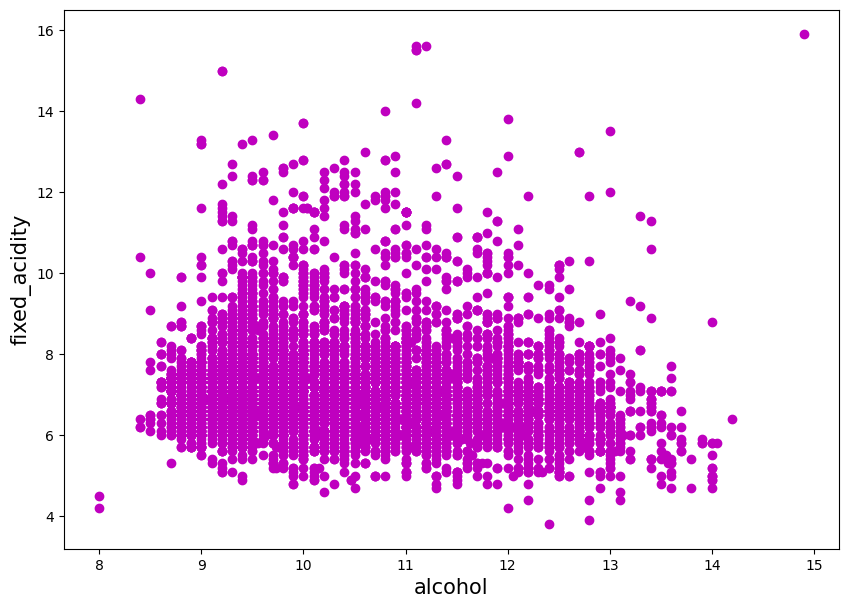

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(x="alcohol",y="fixed acidity",data =df_vinos,marker= 'o',c="m")
plt.xlabel("alcohol",fontsize=15)
plt.ylabel("fixed_acidity",fontsize=15)
plt.show()

C:\Users\gusta\AppData\Local\Temp\ipykernel_1476\2746790274.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_vinos["quality"],bins=10)
c:\Users\gusta\OneDrive\Documentos\vinosISPC\procesamiento_de_datos_G11_ISPC-main\pp1-venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gusta\OneDrive\Documentos\vinosISPC\procesamiento_de_datos_G11_ISPC-main\pp1-venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated 

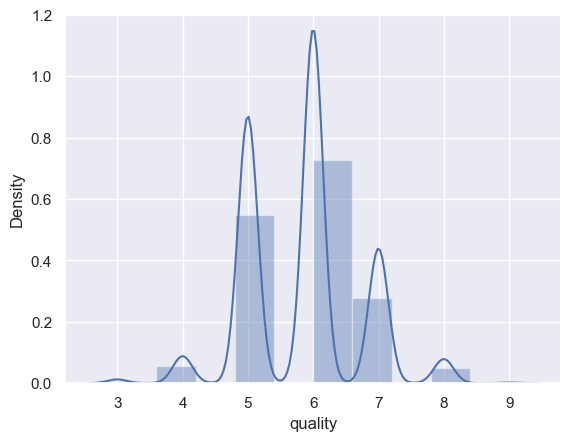

In [6]:
import seaborn as sns

sns.set()
sns.distplot(df_vinos["quality"],bins=10)
plt.show()

In [ ]:
sns.set()
sns.pairplot(df_vinos)
plt.show()

c:\Users\gusta\OneDrive\Documentos\vinosISPC\procesamiento_de_datos_G11_ISPC-main\pp1-venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gusta\OneDrive\Documentos\vinosISPC\procesamiento_de_datos_G11_ISPC-main\pp1-venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gusta\OneDrive\Documentos\vinosISPC\procesamiento_de_datos_G11_ISPC-main\pp1-venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gusta\OneDrive\Documentos

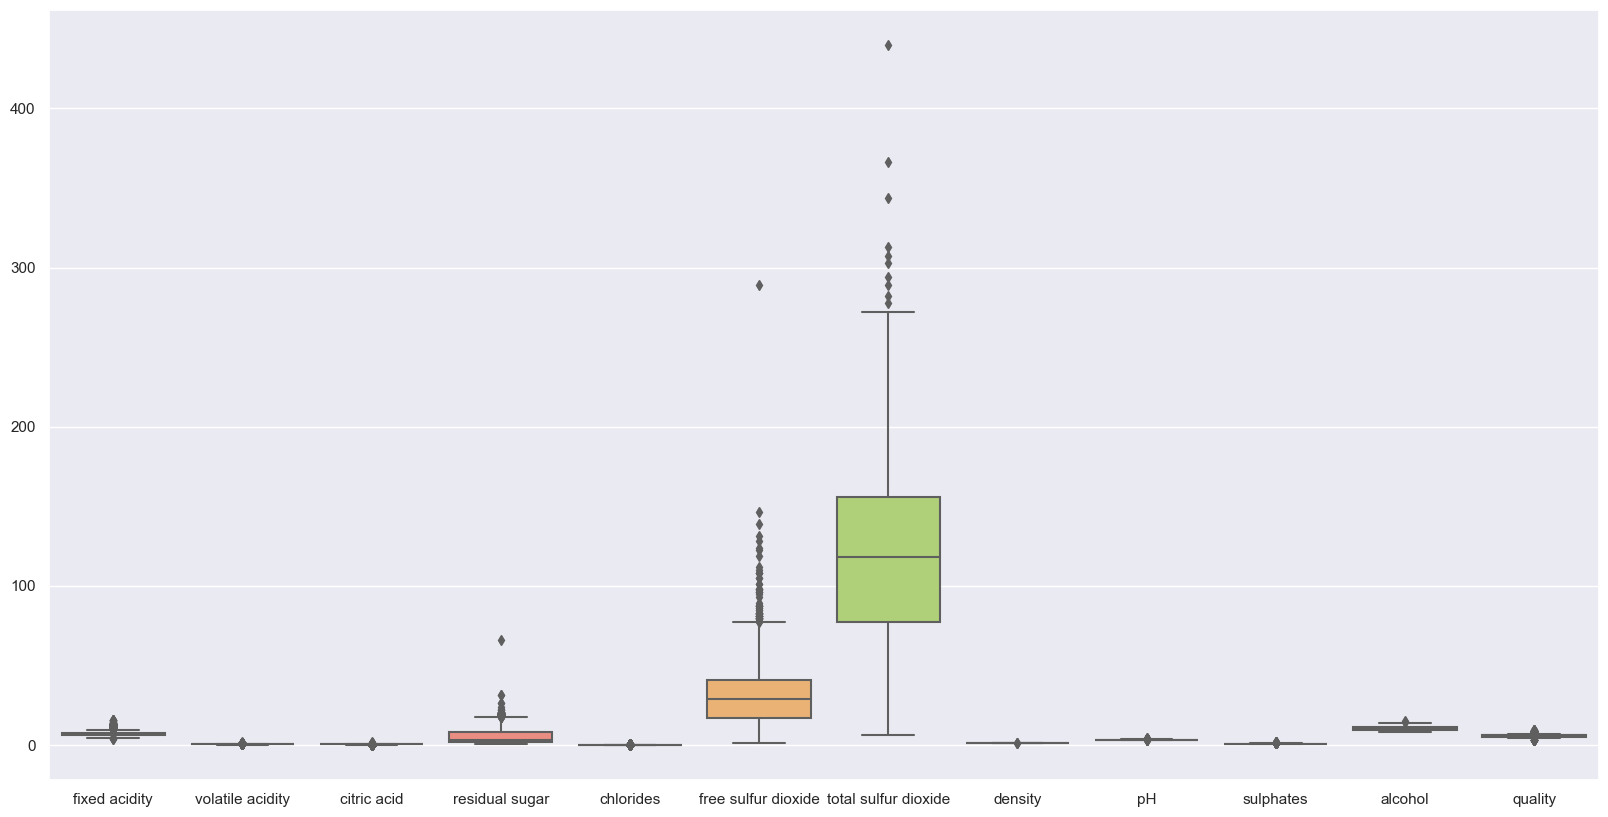

In [7]:
sns.set()
plt.figure(figsize=(20,10))
sns.boxplot(data=df_vinos,palette="Set3")
plt.show()

Manejo de outliers, teniendo en cuenta que la distribucion de calidades es normal

In [8]:
lower_limit = df_vinos["free sulfur dioxide"].mean() - 3*df_vinos["free sulfur dioxide"].std()
upper_limit = df_vinos["free sulfur dioxide"].mean() + 3*df_vinos["free sulfur dioxide"].std()

print(lower_limit,upper_limit)


-22.722879937832957 83.77351869418204


In [9]:
df_vinos2 =df_vinos[(df_vinos["free sulfur dioxide"] > lower_limit) & (df_vinos["free sulfur dioxide"] < upper_limit)]


In [10]:
df_vinos.shape[0] -df_vinos2.shape[0]

36

In [11]:
lower_limit = df_vinos2['total sulfur dioxide'].mean() - 3*df_vinos2['total sulfur dioxide'].std()
upper_limit = df_vinos2['total sulfur dioxide'].mean() + 3*df_vinos2['total sulfur dioxide'].std()

In [12]:
df_vinos3 = df_vinos2[(df_vinos2['total sulfur dioxide'] > lower_limit) & (df_vinos2['total sulfur dioxide'] < upper_limit)]
df_vinos3.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [13]:
lower_limit = df_vinos3['total sulfur dioxide'].mean() - 3*df_vinos3['total sulfur dioxide'].std()
upper_limit = df_vinos3['total sulfur dioxide'].mean() + 3*df_vinos3['total sulfur dioxide'].std()

In [14]:
df_vinos4 = df_vinos3[(df_vinos3['total sulfur dioxide'] > lower_limit) & (df_vinos3['total sulfur dioxide'] < upper_limit)]
df_vinos4.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [15]:
lower_limit = df_vinos4['residual sugar'].mean() - 3*df_vinos4['residual sugar'].std()
upper_limit = df_vinos4['residual sugar'].mean() + 3*df_vinos4['residual sugar'].std()

In [61]:
df_vinos5 = df_vinos4[(df_vinos4['residual sugar'] > lower_limit) & (df_vinos4['residual sugar'] < upper_limit)]
df_vinos5.head()

df_vinos5_2 = pd.DataFrame(df_vinos5)

In [17]:
df_vinos5.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Lo que hace ahora es cambiar los valores de la variable quality por str, y luego volver a cambiarlos por int, pero ahora solo 3 calidades, y no 10 calidades.

In [62]:
quality_mapping = { 3 : "Low",4 : "Low",5: "Medium",6 : "Medium",7: "Medium",8 : "High",9 : "High"}
quality_mapping_2 = { 3 : "Low",4 : "Low",5: "Low",6 : "Medium",7: "High",8 : "High",9 : "High"}

In [63]:
df_vinos5['quality'] = df_vinos5['quality'].map(quality_mapping)
df_vinos5_2['quality'] = df_vinos5_2['quality'].map(quality_mapping_2)

C:\Users\gusta\AppData\Local\Temp\ipykernel_1476\2075986637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vinos5['quality'] = df_vinos5['quality'].map(quality_mapping)


In [64]:
df_vinos5.quality.value_counts()


quality
Medium    5997
Low        239
High       194
Name: count, dtype: int64

In [65]:
df_vinos5_2.quality.value_counts()

quality
Medium    2806
Low       2355
High      1269
Name: count, dtype: int64

In [67]:
x = df_vinos5.drop("quality",axis=True)
y = df_vinos5["quality"]

In [68]:
x2 = df_vinos5_2.drop("quality",axis=True)
y2 = df_vinos5_2["quality"]

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
model5 = ExtraTreesClassifier()
model5.fit(x,y)

ExtraTreesClassifier()

In [69]:
model5_2 = ExtraTreesClassifier()
model5_2.fit(x2,y2)

ExtraTreesClassifier()

In [70]:
print(model5.feature_importances_)

[0.08396759 0.105353   0.08455754 0.09297394 0.08791987 0.09878546
 0.08823989 0.08775489 0.08419636 0.09195193 0.09429951]


In [71]:
print(model5_2.feature_importances_)

[0.07676628 0.10334121 0.07944551 0.08321969 0.08158511 0.08521104
 0.08545261 0.09676509 0.07953271 0.08372806 0.14495269]


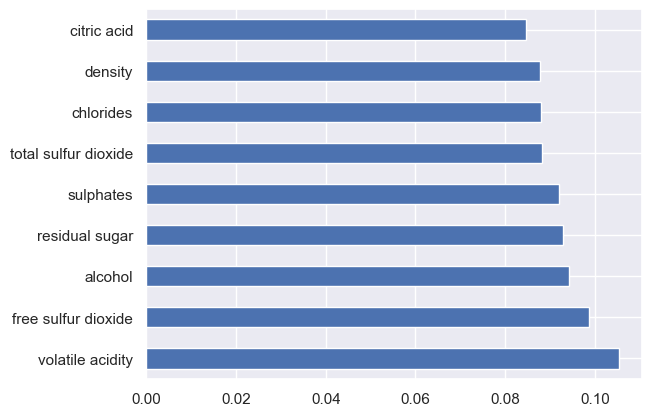

In [29]:
feat_importances = pd.Series(model5.feature_importances_,index =x.columns)
feat_importances.nlargest(9).plot(kind="barh")
plt.show()

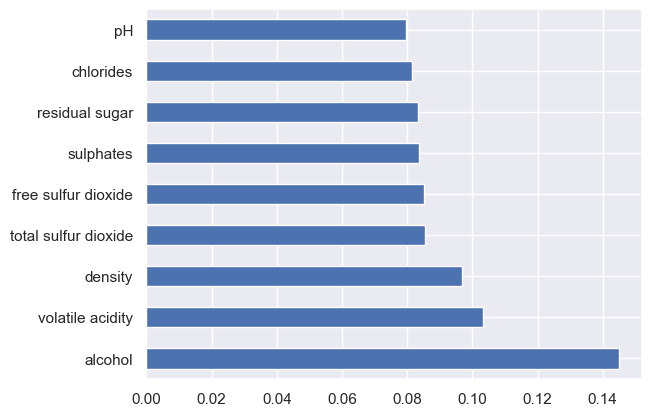

In [72]:
feat_importances = pd.Series(model5_2.feature_importances_,index =x.columns)
feat_importances.nlargest(9).plot(kind="barh")
plt.show()

In [30]:
mapping_quality = {"Low" : 0,"Medium": 1,"High" : 2}
df_vinos5["quality"] =  df_vinos5["quality"].map(mapping_quality)

C:\Users\gusta\AppData\Local\Temp\ipykernel_1476\2680808496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vinos5["quality"] =  df_vinos5["quality"].map(mapping_quality)


In [31]:
x = df_vinos5.drop("quality",axis=True)
y = df_vinos5["quality"]

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [33]:
print(model.feature_importances_)

[0.08439931 0.10333032 0.08228118 0.0926932  0.08658187 0.10015528
 0.08920847 0.08811749 0.08523207 0.08960094 0.09839985]


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [35]:
model_params  = {
    "svm" : {
        "model":SVC(gamma="auto"),
        "params":{
            'C' : [1,10,20],
            'kernel':["rbf"]
        }
    },
    
    "decision_tree":{
        "model": DecisionTreeClassifier(),
        "params":{
            'criterion':["entropy","gini"],
            "max_depth":[5,8,9]
        }
    },
    
    "random_forest":{
        "model": RandomForestClassifier(),
        "params":{
            "n_estimators":[1,5,10],
            "max_depth":[5,8,9]
        }
    },
    "naive_bayes":{
        "model": GaussianNB(),
        "params":{}
    },
    
    'logistic_regression' : {
        'model' : LogisticRegression(solver='liblinear',multi_class = 'auto'),
        'params': {
            "C" : [1,5,10]
        }
    }
    
}

In [36]:
score=[]
for model_name,mp in model_params.items():
    clf = GridSearchCV(mp["model"],mp["params"],cv=8,return_train_score=False)
    clf.fit(x,y)
    score.append({
        "Model" : model_name,
        "Best_Score": clf.best_score_,
        "Best_Params": clf.best_params_
    })

In [37]:
df_vinos6 = pd.DataFrame(score,columns=["Model","Best_Score","Best_Params"])

In [38]:
df_vinos6

,Model,Best_Score,Best_Params
0,svm,0.931882,"{'C': 1, 'kernel': 'rbf'}"
1,decision_tree,0.918496,"{'criterion': 'gini', 'max_depth': 5}"
2,random_forest,0.931882,"{'max_depth': 5, 'n_estimators': 10}"
3,naive_bayes,0.772405,{}
4,logistic_regression,0.932504,{'C': 1}


In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [40]:
x_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000
mean,7.216544,0.342128,0.318186,5.375632,0.056402,29.787228,114.184001,0.994706,3.221005,0.531547,10.479887
std,1.295297,0.167030,0.145871,4.613316,0.035343,16.614537,55.929672,0.002919,0.160545,0.148420,1.192035
min,3.900000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,75.750000,0.992380,3.110000,0.430000,9.500000
50%,7.000000,0.300000,0.310000,2.900000,0.047000,28.000000,117.000000,0.994920,3.210000,0.510000,10.300000
75%,7.700000,0.410000,0.390000,8.100000,0.066000,41.000000,154.000000,0.997000,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.000000,19.600000,0.611000,83.000000,282.000000,1.003690,4.010000,1.980000,14.900000


In [41]:
x_test.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000
mean,7.230210,0.332516,0.319557,5.315591,0.054938,31.057543,117.811431,0.994518,3.211866,0.531967,10.560026
std,1.316412,0.156305,0.141329,4.492264,0.034475,16.604890,55.411099,0.002937,0.160862,0.150587,1.190221
min,3.800000,0.080000,0.000000,0.700000,0.012000,1.000000,6.000000,0.987420,2.740000,0.230000,8.400000
25%,6.400000,0.230000,0.250000,1.900000,0.037000,18.000000,80.250000,0.992100,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.200000,0.047000,30.000000,118.000000,0.994605,3.200000,0.510000,10.400000
75%,7.700000,0.390000,0.390000,7.800000,0.064000,42.000000,157.000000,0.996822,3.310000,0.600000,11.400000
max,15.600000,1.090000,1.660000,19.450000,0.610000,83.000000,272.000000,1.003200,3.850000,2.000000,14.050000


c:\Users\gusta\OneDrive\Documentos\vinosISPC\procesamiento_de_datos_G11_ISPC-main\pp1-venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gusta\OneDrive\Documentos\vinosISPC\procesamiento_de_datos_G11_ISPC-main\pp1-venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\gusta\OneDrive\Documentos\vinosISPC\procesamiento_de_datos_G11_ISPC-main\pp1-venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gusta\OneDrive\

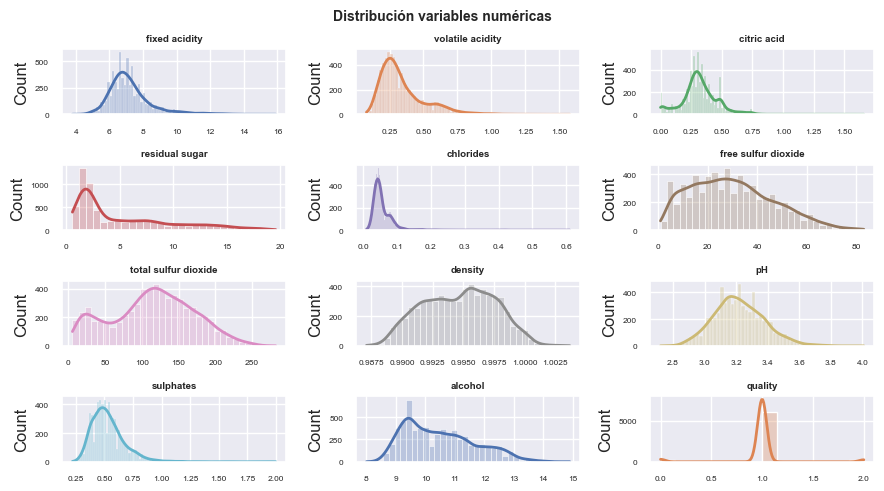

In [43]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = df_vinos5.select_dtypes(include=['float64', 'int']).columns
#columnas_numeric = columnas_numeric.drop('precio')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data     = df_vinos5,
        x        = colum,
        stat     = "count",
        kde      = True,
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

c:\Users\gusta\OneDrive\Documentos\vinosISPC\procesamiento_de_datos_G11_ISPC-main\pp1-venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gusta\OneDrive\Documentos\vinosISPC\procesamiento_de_datos_G11_ISPC-main\pp1-venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\gusta\OneDrive\Documentos\vinosISPC\procesamiento_de_datos_G11_ISPC-main\pp1-venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gusta\OneDrive\

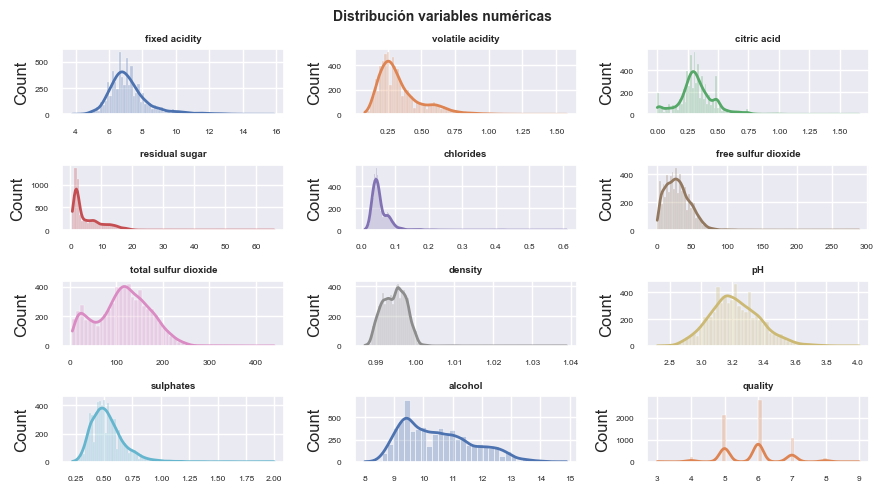

In [44]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = df_vinos.select_dtypes(include=['float64', 'int']).columns
#columnas_numeric = columnas_numeric.drop('precio')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data     = df_vinos,
        x        = colum,
        stat     = "count",
        kde      = True,
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

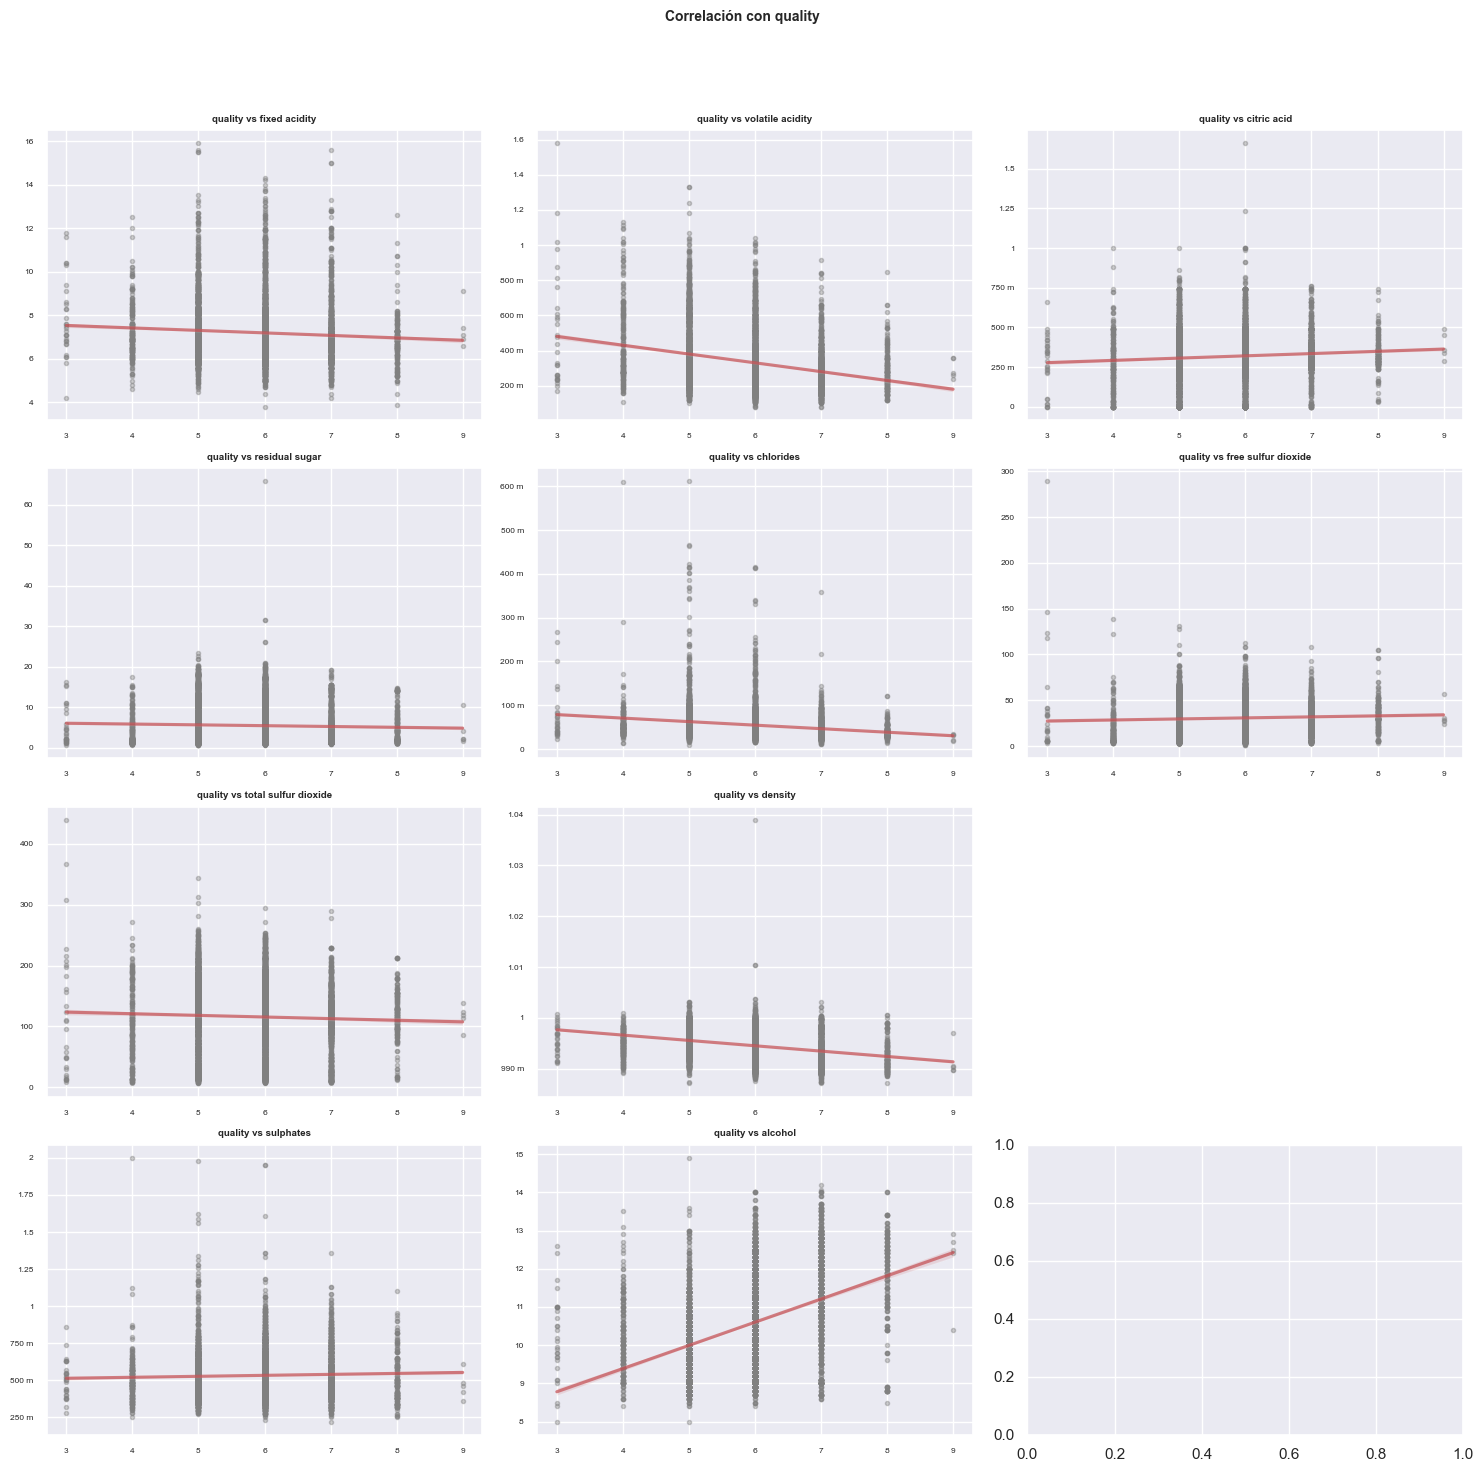

In [51]:
from matplotlib import style
import matplotlib.ticker as ticker

# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axes = axes.flat
columnas_numeric = df_vinos.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('quality')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        y           = df_vinos[colum],
        x           = df_vinos['quality'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"quality vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con quality', fontsize = 10, fontweight = "bold");